In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/maulanaakbardj/Home-Agriculture-Monitoring-System

Cloning into 'Home-Agriculture-Monitoring-System'...
remote: Enumerating objects: 55475, done.
remote: Total 55475 (delta 0), reused 0 (delta 0), pack-reused 55475
Receiving objects: 100% (55475/55475), 871.16 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (55444/55444), done.


In [3]:
import os

In [4]:
mypath= '/content/Home-Agriculture-Monitoring-System/ML/Data/Anggur/'

In [5]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Busuk Hitam                            2360
Esca (Campak hitam)                    2400
Hawar Daun (Bercak Daun Isariopsis)    2152
Sehat                                  2115
dtype: int64

In [8]:
df.head()

,path,file_name,tag
0,/content/Home-Agriculture-Monitoring-System/ML...,279b02e6-6c6e-43eb-abfa-171cd1bded41___FAM_L.B...,Hawar Daun (Bercak Daun Isariopsis)
1,/content/Home-Agriculture-Monitoring-System/ML...,c6a479c0-720d-4c2b-baf9-40715280cf14___FAM_L.B...,Hawar Daun (Bercak Daun Isariopsis)
2,/content/Home-Agriculture-Monitoring-System/ML...,4fba1870-10c5-48f2-838e-c78e0fa40f75___FAM_L.B...,Hawar Daun (Bercak Daun Isariopsis)
3,/content/Home-Agriculture-Monitoring-System/ML...,1ba7bd6f-531d-4c76-a297-ce93ce7b7d98___FAM_L.B...,Hawar Daun (Bercak Daun Isariopsis)
4,/content/Home-Agriculture-Monitoring-System/ML...,30d1cb77-b59b-4aa9-a5b1-45c22fe35304___FAM_L.B...,Hawar Daun (Bercak Daun Isariopsis)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df['path']
y= df['tag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [12]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [13]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [14]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 7221
val size 903
test size 903


In [15]:
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)



set         tag                                
test        Busuk Hitam                             223
            Esca (Campak hitam)                     244
            Hawar Daun (Bercak Daun Isariopsis)     214
            Sehat                                   222
train       Busuk Hitam                            1899
            Esca (Campak hitam)                    1897
            Hawar Daun (Bercak Daun Isariopsis)    1732
            Sehat                                  1693
validation  Busuk Hitam                             238
            Esca (Campak hitam)                     259
            Hawar Daun (Bercak Daun Isariopsis)     206
            Sehat                                   200
dtype: int64 




,path,tag,set
803,/content/Home-Agriculture-Monitoring-System/ML...,Sehat,train
3509,/content/Home-Agriculture-Monitoring-System/ML...,Esca (Campak hitam),train
3633,/content/Home-Agriculture-Monitoring-System/ML...,Busuk Hitam,train


In [16]:
import shutil
from tqdm.notebook import tqdm as tq

In [17]:
datasource_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Anggur/"
dataset_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Anggur/dataset/"

In [18]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [19]:
import tensorflow as tf

In [20]:
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
EPOCH = 10

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [32]:
train_generator = train_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Anggur/dataset/train',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Anggur/dataset/validation',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Anggur/dataset/test',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 7221 images belonging to 4 classes.
Found 903 images belonging to 4 classes.
Found 903 images belonging to 4 classes.


In [33]:
print(labels)

dict_keys(['Busuk Hitam', 'Esca (Campak hitam)', 'Hawar Daun (Bercak Daun Isariopsis)', 'Sehat'])


In [34]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator


In [41]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [35]:
from tensorflow.keras.applications import Xception
# get base models
base_model = Xception(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    classes=num_class,
)


In [36]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)
predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [37]:
# summarize the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [38]:
# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


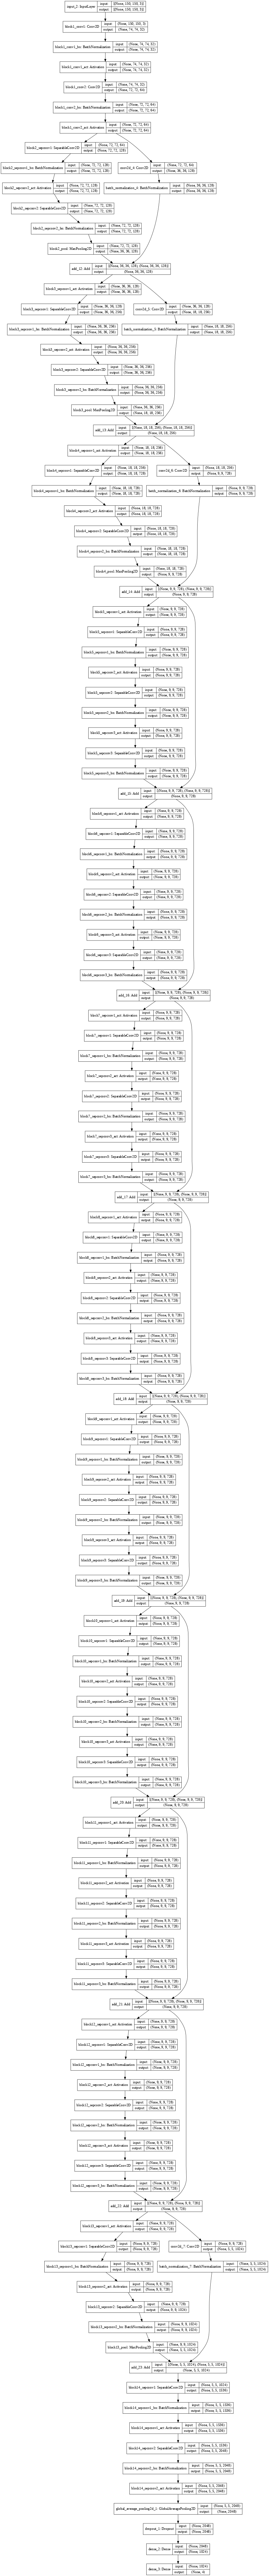

In [39]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model1.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [42]:
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=EPOCH,
        validation_data=val_data,
        validation_steps=len(val_generator), 
        shuffle=True,
        verbose = 1)

Epoch 1/10
452/452 [==============================] - 140s 230ms/step - loss: 0.2622 - accuracy: 0.9355 - val_loss: 0.0581 - val_accuracy: 0.9911
Epoch 2/10
452/452 [==============================] - 102s 225ms/step - loss: 0.1314 - accuracy: 0.9697 - val_loss: 0.0277 - val_accuracy: 0.9911
Epoch 3/10
452/452 [==============================] - 102s 226ms/step - loss: 0.0791 - accuracy: 0.9785 - val_loss: 0.0041 - val_accuracy: 0.9989
Epoch 4/10
452/452 [==============================] - 103s 227ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0135 - val_accuracy: 0.9945
Epoch 5/10
452/452 [==============================] - 103s 229ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0549 - val_accuracy: 0.9922
Epoch 6/10
452/452 [==============================] - 103s 228ms/step - loss: 0.0772 - accuracy: 0.9809 - val_loss: 0.1655 - val_accuracy: 0.9579
Epoch 7/10
452/452 [==============================] - 103s 228ms/step - loss: 0.0361 - accuracy: 0.9904 - val_loss: 0.0058 -

In [43]:
history.history['loss']

[0.26222243905067444,
 0.1313999742269516,
 0.07911287248134613,
 0.026559114456176758,
 0.0437740795314312,
 0.07717274129390717,
 0.03613937646150589,
 0.028889017179608345,
 0.03084244765341282,
 0.02200966514647007]

In [44]:
history.history['accuracy']

[0.9354659914970398,
 0.9696717858314514,
 0.9785348176956177,
 0.9916908740997314,
 0.9871209263801575,
 0.980889081954956,
 0.990444540977478,
 0.9922448396682739,
 0.9916908740997314,
 0.9929372668266296]

In [45]:
from matplotlib import pyplot as plt

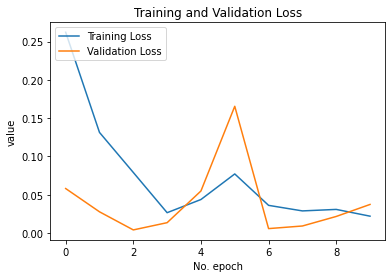

In [46]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

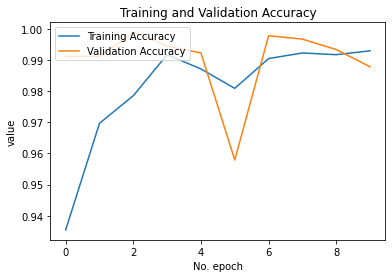

In [47]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [48]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.9956 
Loss on training data: 0.0125 

Accuracy on test data: 0.9945 
Loss on test data: 0.0299 



In [49]:
MODEL_BASE_PATH = "/content/drive/MyDrive/"
PROJECT_NAME = "model_project"
SAVE_MODEL_NAME = "Model_Anggur_Xception.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/model_project/Model_Anggur_Xception.h5...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [50]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [61]:
# Parameters
input_size = (150,150)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['Busuk Hitam', 'Esca (Campak hitam)', 'Hawar Daun (Bercak Daun Isariopsis)', 'Sehat']

In [62]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [63]:
from tensorflow.keras.models import load_model

In [64]:
MODEL_PATH = '/content/drive/MyDrive/model_project/Model_Anggur_Xception.h5'
model = load_model(MODEL_PATH,compile=False)

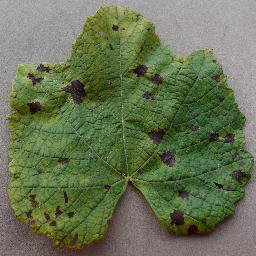

In [65]:
# read image
im = Image.open('/content/Home-Agriculture-Monitoring-System/ML/Data/Anggur/Hawar Daun (Bercak Daun Isariopsis)/01445290-a36f-4435-9b7d-bd1a9d1ff79b___FAM_L.Blight 4626_flipLR.JPG')
display(im)

In [66]:
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y)*100 , "%")

Hawar Daun (Bercak Daun Isariopsis) 100.0 %
